## Tools Imported

In [1]:
#General Libraries
import itertools
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

#Date-Time Libraries
import time
import datetime
from datetime import datetime
from datetime import date
from datetime import timedelta

#Stat Resources
import sys
from natsort import natsorted
from scipy import stats
sns.set()

#Predictive Modelling Packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm

start = time.time()
%matplotlib inline

# To show that libraries and tools are successfully imported.
# Program Source Ackowledgement (Referencing)
print ("Libraries imported")

Libraries imported


In [2]:
pd.set_option('display.max_columns', None)

## Question 1 : Data File Import and Type identification

In [3]:
# To import the csv data set into Jupyter Notebook and get general information on data types.
ECA_data = pd.read_csv(r'ECA_data.csv')
ECA_data.info()
# Notice that there is one categorical variable listed as an object (R3)
# Below is the total number of floats, intergers and objects. For the purposes of this project all types should be ints.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

# Question 2 : Data Preparation

### Data Pre-processing 1

In [4]:
# To replace the special characters of '$' and ',' from inconsistent data entry. 
# Note that ',' and '$' are replaced one at a time.
ECA_data['R3'] = ECA_data['R3'].str.replace(',','', regex=True)
ECA_data['R3'] = ECA_data['R3'].str.replace('$','', regex=True)

# Ensures that R3 is fully processed as an interger. Just in case. 
ECA_data['R3'] = ECA_data['R3'].astype(int)

#To confirm that the code works in changing all the values to intergers for R3.
ECA_data.info()
#Note that the rest of the variables are all intergers so we shouldn't need to process them the way we did R3.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

### Data Pre-processing 2

In [5]:
# Tells us the frequency of NaN (missing values) in the respective variables (columns)
ECA_data.isnull().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [6]:
# Given the above output we need to replace Education and Marital blank values with the variables' modes.

#Replaces NaN (Na) values in Education with its mode.
ECA_data['EDUCATION'] = ECA_data['EDUCATION'].fillna(ECA_data['EDUCATION'].mode()[0])
#Replaces NaN (Na) values in Marital with its mode.
ECA_data['MARITAL'] = ECA_data['MARITAL'].fillna(ECA_data['MARITAL'].mode()[0])
# Moreover, we should convert EDUCATION and MARITAL to intergers since the NaN values preventing this were replaced.
ECA_data['EDUCATION'] = ECA_data['EDUCATION'].astype(int)
ECA_data['MARITAL'] = ECA_data['MARITAL'].astype(int)
# To confirm that the code works in changing all the NaN values in Education and Marital with the variables' modes.
ECA_data.isnull().sum()
# Becuase Education and Marital have output values of 0 we can now confirm there are no more NaN values in these columns.
# The blanks have thus been changed to the variables' respective modes.

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

### Data Pre-processing 3

In [7]:
ECA_data.describe()

ID          LIMIT        BALANCE         INCOME  \
count  18769.000000   18769.000000   18769.000000   18769.000000   
mean    9382.049710  168275.543716    9119.887343  177765.809100   
std     5418.203513  129405.294386   13045.368642  143092.431648   
min        1.000000   10000.000000       0.000000   10000.000000   
25%     4690.000000   50000.000000     640.325000   56494.000000   
50%     9382.000000  140000.000000    3959.025000  148225.000000   
75%    14074.000000  240000.000000   11975.250000  256826.000000   
max    18766.000000  800000.000000  130692.450000  908846.000000   

             RATING        GENDER     EDUCATION       MARITAL           AGE  \
count  18769.000000  18769.000000  18769.000000  18769.000000  18769.000000   
mean       0.219244      0.618307      1.790079      1.515904     35.578614   
std        0.413746      0.485815      0.732093      0.519520      9.556397   
min        0.000000      0.000000      0.000000      0.000000     -1.000000   
25%        0.000000      0.000000      1.000000      1.000000     28.000000   
50%        0.000000      1.000000      2.000000      2.000000     34.000000   
75%        0.000000      1.000000      2.000000      2.000000     41.000000   
max        1.000000      1.000000      3.000000      2.000000    199.000000   

                 S1            S2            S3            S4            S5  \
count  18769.000000  18769.000000  18769.000000  18769.000000  18769.000000   
mean       0.128776      0.111514      0.088817      0.040759      0.038628   
std        0.954745      0.929861      0.921901      0.860155      0.849596   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        7.000000      8.000000      7.000000      7.000000      7.000000   

                  B1             B2             B3             B4  \
count   18769.000000   18769.000000   18769.000000   18769.000000   
mean    49985.762587   48168.321541   45025.373328   41058.509137   
std     71927.408384   70318.908697   66107.280567   61697.041169   
min    -69777.000000 -157264.000000  -65167.000000  -81334.000000   
25%      3081.000000    2845.000000    2513.000000    1950.000000   
50%     21386.000000   20421.000000   19502.000000   18356.000000   
75%     65145.000000   61943.000000   57687.000000   50758.000000   
max    743970.000000  855086.000000  706864.000000  823540.000000   

                  B5            R1             R2             R3  \
count   18769.000000  1.876900e+04   18769.000000   18769.000000   
mean    39624.961319  6.026392e+03    5651.754862    4935.711759   
std     59913.089587  2.289899e+04   18614.886581   16463.599038   
min   -209051.000000  0.000000e+00       0.000000       0.000000   
25%      1430.000000  1.000000e+03     579.000000     315.000000   
50%     17419.000000  2.132000e+03    2000.000000    1500.000000   
75%     49792.000000  5.002000e+03    5000.000000    4062.000000   
max    514975.000000  1.227082e+06  889043.000000  621000.000000   

                  R4             R5  
count   18769.000000   18769.000000  
mean     4764.085354    5185.538068  
std     15031.279673   17424.054451  
min         0.000000       0.000000  
25%       285.000000     215.000000  
50%      1508.000000    1547.000000  
75%      4068.000000    4095.000000  
max    426529.000000  527143.000000

In [8]:
# Notice the for age minimum  is -1 and maximum is 199. Data needs to be cleaned for such entry errors.
#To identify the frequency of records with these errors in a histogram.
AGE_dist = px.box(ECA_data, x="AGE", points='all', title = "Box Plot for Age distribution (Before)")
AGE_dist.show()

In [9]:
# To identify the frequency of records with these errors in a table.
AGE_ERROR = ECA_data.loc[(ECA_data['AGE'] < 0) | (ECA_data['AGE'] > 100 )]
pd.crosstab(index = AGE_ERROR['AGE'], columns='count')
# In the frequecy table we can see there are 10 records with values exactly at -1 and 199 respectively.
# There are no other records beyond 100 nor are there any other records below -1.
# Note that the AGE variable is an interger type so we dont need to worry abt values between 0 and -1.

col_0  count
AGE         
-1         5
 199       5

In [10]:
# To preserve data we will replace these specific values with the mean age value.
# We use the mean as AGE is at the very least an ordinal variable unlike MARRIAGE and EDUCATION which are nominal.

#To calculate the mean of AGE
AGE_mean = ECA_data['AGE'].mean()
# We replace the desired values of -1 and 199 with the mean.
ECA_data['AGE'] = ECA_data['AGE'].replace([-1, 199], AGE_mean, inplace = False)
ECA_data['AGE'] = ECA_data['AGE'].astype(int,copy=True)
# We check if these abnormal values have been successfully replaced
AGE_dist = px.box(ECA_data, x="AGE", points='all', title = "Box Plot for Age distribution (After)")
AGE_dist.show()

In [11]:
ECA_data

ID   LIMIT    BALANCE  INCOME  RATING  GENDER  EDUCATION  MARITAL  \
0          1  210000      0.000  235822       1       1          1        2   
1          2  260000  10928.050  278481       0       0          2        2   
2          3  400000  65397.850  431993       0       0          3        1   
3          4   20000   3695.300   22368       0       0          2        1   
4          5  180000     68.250  166900       0       1          2        1   
...      ...     ...        ...     ...     ...     ...        ...      ...   
18764  18762  220000  33065.900  225862       0       0          3        1   
18765  18763  150000    294.525  149966       0       0          3        2   
18766  18764   30000    623.875   30327       1       0          2        2   
18767  18765   80000      0.000   94607       1       0          3        1   
18768  18766   50000   8387.575   40267       1       0          2        1   

       AGE  S1  S2  S3  S4  S5      B1      B2      B3      B4      B5     R1  \
0       30   0   0   0   0   0       0       0       0       0       0      0   
1       31   0   0   0   0   0   54074   46407   38874   31324   24031   2000   
2       51   0   0   0   0   0  343591  352484  338823  283288  185288  15000   
3       58  -1   2   2  -1  -1   21470     200       0   28740    1295      0   
4       42   0   0   0   0   0    1260     598    2056    4300    1802    598   
...    ...  ..  ..  ..  ..  ..     ...     ...     ...     ...     ...    ...   
18764   39   0   0   0   0   0  192815  208365   88004   31237   15980  20000   
18765   43  -1  -1  -1   0   0    1828    3502    8979    5190       0   3526   
18766   37   3   2  -1   0   0    3356    2758   20878   20582   19357      0   
18767   41  -1   0   0   0  -1   78379   76304   52774   11855   48944   3409   
18768   46   0   0   0   0   0   48905   49764   36535   32428   15313   1800   

          R2     R3     R4     R5  
0          0      0      0      0  
1       2000   2000   2000  72000  
2      14000  11500   8000   7000  
3          0  28740   1565      0  
4       2056   4300   1802   3691  
...      ...    ...    ...    ...  
18764   5003   3047   5000   1000  
18765   8998    129      0      0  
18766  22000   4200   2000   3100  
18767   1178   1926  52964   1804  
18768   1430   1000   1000   1000  

[18769 rows x 24 columns]

### Data Pre-processing 4

In [12]:
#To check if there are any duplicate values in the dataset
ECA_data.duplicated().sum()

3

In [13]:
#To remove duplicate values that may have occured from data pre-processing steps 1 and 2. (3 observations)
# Note keep = first will prevent the originals from being removed as well.
ECA_data = ECA_data.drop_duplicates(keep='first')

# To confirm that the code works in removing all duplicate rows in the data set.
ECA_data.duplicated().sum()

0

In [14]:
ECA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18766 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18766 non-null  int64  
 1   LIMIT      18766 non-null  int64  
 2   BALANCE    18766 non-null  float64
 3   INCOME     18766 non-null  int64  
 4   RATING     18766 non-null  int64  
 5   GENDER     18766 non-null  int64  
 6   EDUCATION  18766 non-null  int32  
 7   MARITAL    18766 non-null  int32  
 8   AGE        18766 non-null  int32  
 9   S1         18766 non-null  int64  
 10  S2         18766 non-null  int64  
 11  S3         18766 non-null  int64  
 12  S4         18766 non-null  int64  
 13  S5         18766 non-null  int64  
 14  B1         18766 non-null  int64  
 15  B2         18766 non-null  int64  
 16  B3         18766 non-null  int64  
 17  B4         18766 non-null  int64  
 18  B5         18766 non-null  int64  
 19  R1         18766 non-null  int64  
 20  R2    

# Question 3 : Data Visualisation

In [15]:
# For SOME of the visualization we will use a copy of the ECA_data that has the string versions of the nominal/ordinal values
ECA_data_str = ECA_data.copy(deep=True)
#Dictionary containing conversion keys.
RATING_con = {0 :'GOOD',
              1 :'BAD'}

GENDER_con = {0 :'MALE',
              1 :'FEMALE'}

EDUCATION_con = {0 : 'Others',
                 1 : 'Postgraduate', 
                 2 : 'Tertiary', 
                 3 : 'High School'}

MARITAL_con = {0 : 'Others', 
               1 : 'Single', 
               2 : 'Married'}
S1_con = {-1 : 'Prompt payment', 
         0 : 'Minimum sum payment'}

#Attributes the nominal intergers to the string values.
ECA_data_str['RATING_str'] = ECA_data_str['RATING'].map(RATING_con)
ECA_data_str['GENDER_str'] = ECA_data_str['GENDER'].map(GENDER_con)
ECA_data_str['EDUCATION_str'] = ECA_data_str['EDUCATION'].map(EDUCATION_con)
ECA_data_str['MARITAL_str'] = ECA_data_str['MARITAL'].map(MARITAL_con)
ECA_data_str['S1_str'] = ECA_data_str['S1'].map(S1_con)
ECA_data_str['S2_str'] = ECA_data_str['S2'].map(S1_con)
ECA_data_str['S3_str'] = ECA_data_str['S3'].map(S1_con)
ECA_data_str['S4_str'] = ECA_data_str['S4'].map(S1_con)
ECA_data_str['S5_str'] = ECA_data_str['S5'].map(S1_con)
ECA_data_str[['S1_str', 'S2_str','S3_str','S4_str','S5_str']] = ECA_data_str[['S1_str', 
                                                                              'S2_str',
                                                                              'S3_str',
                                                                              'S4_str',
                                                                              'S5_str']].fillna('Delayed Payment')
#Binning AGE into groups seperated by intervals of 10 years. 
ECA_data_str['AGE_group'] = pd.cut(x=ECA_data_str['AGE'], bins=[20, 29, 39, 49, 59, 69, 79, 89], 
                                  labels=[20, 30, 40, 50, 60, 70, 80])
ECA_data_str

ID   LIMIT    BALANCE  INCOME  RATING  GENDER  EDUCATION  MARITAL  \
0          1  210000      0.000  235822       1       1          1        2   
1          2  260000  10928.050  278481       0       0          2        2   
2          3  400000  65397.850  431993       0       0          3        1   
3          4   20000   3695.300   22368       0       0          2        1   
4          5  180000     68.250  166900       0       1          2        1   
...      ...     ...        ...     ...     ...     ...        ...      ...   
18764  18762  220000  33065.900  225862       0       0          3        1   
18765  18763  150000    294.525  149966       0       0          3        2   
18766  18764   30000    623.875   30327       1       0          2        2   
18767  18765   80000      0.000   94607       1       0          3        1   
18768  18766   50000   8387.575   40267       1       0          2        1   

       AGE  S1  S2  S3  S4  S5      B1      B2      B3      B4      B5     R1  \
0       30   0   0   0   0   0       0       0       0       0       0      0   
1       31   0   0   0   0   0   54074   46407   38874   31324   24031   2000   
2       51   0   0   0   0   0  343591  352484  338823  283288  185288  15000   
3       58  -1   2   2  -1  -1   21470     200       0   28740    1295      0   
4       42   0   0   0   0   0    1260     598    2056    4300    1802    598   
...    ...  ..  ..  ..  ..  ..     ...     ...     ...     ...     ...    ...   
18764   39   0   0   0   0   0  192815  208365   88004   31237   15980  20000   
18765   43  -1  -1  -1   0   0    1828    3502    8979    5190       0   3526   
18766   37   3   2  -1   0   0    3356    2758   20878   20582   19357      0   
18767   41  -1   0   0   0  -1   78379   76304   52774   11855   48944   3409   
18768   46   0   0   0   0   0   48905   49764   36535   32428   15313   1800   

          R2     R3     R4     R5 RATING_str GENDER_str EDUCATION_str  \
0          0      0      0      0        BAD     FEMALE  Postgraduate   
1       2000   2000   2000  72000       GOOD       MALE      Tertiary   
2      14000  11500   8000   7000       GOOD       MALE   High School   
3          0  28740   1565      0       GOOD       MALE      Tertiary   
4       2056   4300   1802   3691       GOOD     FEMALE      Tertiary   
...      ...    ...    ...    ...        ...        ...           ...   
18764   5003   3047   5000   1000       GOOD       MALE   High School   
18765   8998    129      0      0       GOOD       MALE   High School   
18766  22000   4200   2000   3100        BAD       MALE      Tertiary   
18767   1178   1926  52964   1804        BAD       MALE   High School   
18768   1430   1000   1000   1000        BAD       MALE      Tertiary   

      MARITAL_str               S1_str               S2_str  \
0         Married  Minimum sum payment  Minimum sum payment   
1         Married  Minimum sum payment  Minimum sum payment   
2          Single  Minimum sum payment  Minimum sum payment   
3          Single       Prompt payment      Delayed Payment   
4          Single  Minimum sum payment  Minimum sum payment   
...           ...                  ...                  ...   
18764      Single  Minimum sum payment  Minimum sum payment   
18765     Married       Prompt payment       Prompt payment   
18766     Married      Delayed Payment      Delayed Payment   
18767      Single       Prompt payment  Minimum sum payment   
18768      Single  Minimum sum payment  Minimum sum payment   

                    S3_str               S4_str               S5_str AGE_group  
0      Minimum sum payment  Minimum sum payment  Minimum sum payment        30  
1      Minimum sum payment  Minimum sum payment  Minimum sum payment        30  
2      Minimum sum payment  Minimum sum payment  Minimum sum payment        50  
3          Delayed Payment       Prompt payment       Prompt payment        50  
4      Minimum sum payment  Minimum sum payment  

### Visualisation 1

In [16]:
dfg1=ECA_data_str.groupby('AGE_group').count().reset_index()

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=dfg1.AGE_group,y=dfg1.ID, name='AGE_group'),
    row=1, col=1
)

#fig.add_trace(
    #go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    #row=1, col=2
#)

#fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")

In [17]:
# Creates a table for the bar chart. Breaks down frequency of AGE_group and GENDER_str
TABLE_1 = pd.crosstab(index = ECA_data_str['AGE_group'], columns = ECA_data_str['GENDER_str'])
TABLE_1

GENDER_str  FEMALE  MALE
AGE_group               
20            4009  1921
30            4285  2787
40            2406  1691
50             807   661
60              88    96
70               7     7
80               0     1

In [18]:
# Creates a bar chart showcasing the frequency of the AGE_bins of clients and thier INCOME
# This graph is interactive, by clicking on the legend you can play around with the variables.

# Parameters of settings needed to create the graph
CHART_1 = px.bar(TABLE_1,
                 y = ['MALE','FEMALE'],
                 x = ['20s', '30s', '40s', '50s', '60s', '70s', '80s'],
                 barmode='group',
                 text_auto='',
                 labels = dict(x = 'AGE_group', value = 'count'),
                 title = 'Number of clients broken down by AGE & GENDER',)
# label settings for the respective bars
CHART_1.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

CHART_1.show() 

### Visualisation 2

In [19]:
#Creates a bar chart showcasing the frequency of the age of commuters by type of subscription

#This graph is interactive, by clicking on the legend you can play around with the variables.
CHART_2 = px.histogram(ECA_data_str,
                 x = 'INCOME',
                 labels = dict(x = 'AGE_group', value = 'count'),
                 title = 'Number of clients broken down by AGE & GENDER',
                height = 500,
                width = 950)
# label settings for the respective bars
#CHART_2.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
CHART_2.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
CHART_2.show() 

In [20]:
#50k is the generally recognised as low income hence
Freq_poor = pd.crosstab(ECA_data_str['INCOME']<50000,'Index')
Freq_poor 

col_0   Index
INCOME       
False   14727
True     4039

In [21]:
INCOME_Median = ECA_data_str['INCOME'].median()
INCOME_Median

148210.5

### Visualisation 3

In [22]:
#This graph is interactive, by clicking on the legend you can play around with the variables.


In [23]:
fig = go.Figure(data=[go.Histogram(y=ECA_data_str['BALANCE'],cumulative_enabled=True)])
fig.show()

In [24]:
Freq_empty = pd.crosstab(ECA_data_str['BALANCE']==0,'Index')
Freq_empty 

col_0    Index
BALANCE       
False    17190
True      1576

In [25]:
INCOME_Median = ECA_data_str['BALANCE'].median()
INCOME_Median

3959.55

### Visualisation 4

In [26]:
TABLE_2A = pd.crosstab(index = ECA_data_str['S1_str'], columns = 'Index')
TABLE_2A

col_0                Index
S1_str                    
Delayed Payment       2793
Minimum sum payment  12371
Prompt payment        3602

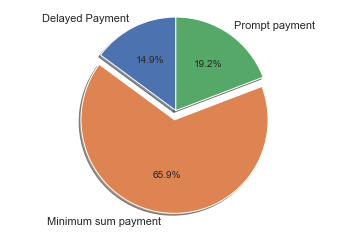

In [27]:
labels = 'Delayed Payment', 'Minimum sum payment', 'Prompt payment'
sizes = [2793, 12371, 3602]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Minimum sum payment')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [28]:
rslt_df = ECA_data_str.loc[ECA_data_str['BALANCE'] == 0] 

In [29]:
TABLE_2B = pd.crosstab(index = rslt_df['S1_str'], columns = 'Index')
TABLE_2B

col_0                Index
S1_str                    
Delayed Payment          1
Minimum sum payment   1206
Prompt payment         369

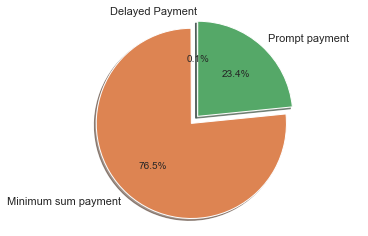

In [30]:
labels = 'Delayed Payment', 'Minimum sum payment', 'Prompt payment'
sizes = [1, 1206, 369]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Minimum sum payment')

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Visualisation 5

# Question 4 : Linear Regression Model

### Correlation visualization

<function matplotlib.pyplot.show(close=None, block=None)>

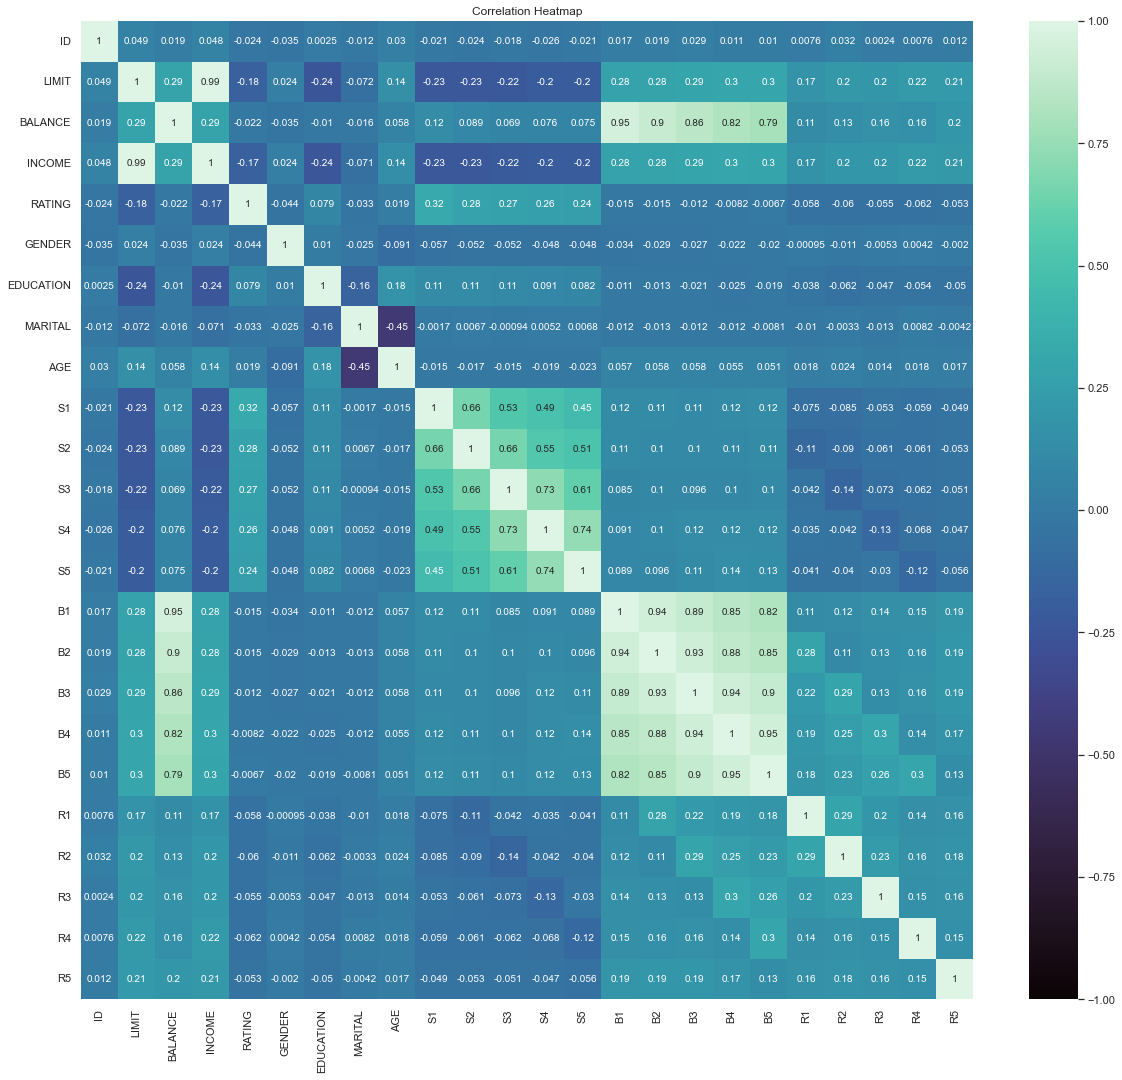

In [31]:
corr = ECA_data.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap = 'mako')
plt.title('Correlation Heatmap')
plt.show

### Linear Regression Pre-Processing (GENERAL)

In [32]:
#TO set the encoding parameters for EDUCATION and MARITAL
#Prefix dictionaries
{'EDUCATION':'EDU'}.items()
{'MARITAL':'MAR'}.items()
def onehot_encode(df, column_dict):
    df = df.copy()
    #Allows mapping of prefixes to each value column
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        #To drop the old EDUCATION and MARITAL columns
        df = df.drop(column, axis=1)
    return df

### Linear Regression Pre-Processing (NON-Standardized)

In [33]:
#Pre-processing code including addition of encoding parameters
#Here we split 
def preprocess_inputs(df):
    df = df.copy()
    #Drop ID
    df = df.drop('ID', axis=1)
    #Encode parameters from above included
    df = onehot_encode(
        df,
        {
           'EDUCATION': 'EDU',
            'MARITAL': 'MAR'
        }
    )
    
    #Split x (input) and y (target) variables
    y = df[['B1']].copy()
    x = df.drop('B1', axis=1).copy()
    return x,y
#Passes through our ECA_data pandas dataframe through the above parameters
x, y = preprocess_inputs(ECA_data)

In [34]:
#Checks x to ensure successful removal of the target variable
x

LIMIT    BALANCE  INCOME  RATING  GENDER  AGE  S1  S2  S3  S4  S5  \
0      210000      0.000  235822       1       1   30   0   0   0   0   0   
1      260000  10928.050  278481       0       0   31   0   0   0   0   0   
2      400000  65397.850  431993       0       0   51   0   0   0   0   0   
3       20000   3695.300   22368       0       0   58  -1   2   2  -1  -1   
4      180000     68.250  166900       0       1   42   0   0   0   0   0   
...       ...        ...     ...     ...     ...  ...  ..  ..  ..  ..  ..   
18764  220000  33065.900  225862       0       0   39   0   0   0   0   0   
18765  150000    294.525  149966       0       0   43  -1  -1  -1   0   0   
18766   30000    623.875   30327       1       0   37   3   2  -1   0   0   
18767   80000      0.000   94607       1       0   41  -1   0   0   0  -1   
18768   50000   8387.575   40267       1       0   46   0   0   0   0   0   

           B2      B3      B4      B5     R1     R2     R3     R4     R5  \
0           0       0       0       0      0      0      0      0      0   
1       46407   38874   31324   24031   2000   2000   2000   2000  72000   
2      352484  338823  283288  185288  15000  14000  11500   8000   7000   
3         200       0   28740    1295      0      0  28740   1565      0   
4         598    2056    4300    1802    598   2056   4300   1802   3691   
...       ...     ...     ...     ...    ...    ...    ...    ...    ...   
18764  208365   88004   31237   15980  20000   5003   3047   5000   1000   
18765    3502    8979    5190       0   3526   8998    129      0      0   
18766    2758   20878   20582   19357      0  22000   4200   2000   3100   
18767   76304   52774   11855   48944   3409   1178   1926  52964   1804   
18768   49764   36535   32428   15313   1800   1430   1000   1000   1000   

       EDU_0  EDU_1  EDU_2  EDU_3  MAR_0  MAR_1  MAR_2  
0          0      1      0      0      0      0      1  
1          0      0      1      0      0      0      1  
2          0      0      0      1      0      1      0  
3          0      0      1      0      0      1      0  
4          0      0      1      0      0      1      0  
...      ...    ...    ...    ...    ...    ...    ...  
18764      0      0      0      1      0      1      0  
18765      0      0      0      1      0      0      1  
18766      0      0      1      0      0      0      1  
18767      0      0      0      1      0      1      0  
18768      0      0      1      0      0      1      0  

[18766 rows x 27 columns]

In [35]:
#Checks y to ensure the successful isolation of targer variable
y

B1
0           0
1       54074
2      343591
3       21470
4        1260
...       ...
18764  192815
18765    1828
18766    3356
18767   78379
18768   48905

[18766 rows x 1 columns]

### Model Creation

In [36]:
#Training and Test data for x and y is determined using a random state to randomly sample the respective data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)
#Note that random state is used to prevent variation of results each time program is run

In [37]:
#To verify that the split is successful in terms of number of rows and columns
print('(x) population data totals:', x.shape)
print('(y) population data totals:',y.shape)
print('(x_train) training data totals:', x_train.shape)
print('(y_train) training data totals:', y_train.shape)
print('(x_test) testing data totals:', x_test.shape)
print('(y_test) testing data totals:', y_test.shape)

(x) population data totals: (18766, 27)
(y) population data totals: (18766, 1)
(x_train) training data totals: (13136, 27)
(y_train) training data totals: (13136, 1)
(x_test) testing data totals: (5630, 27)
(y_test) testing data totals: (5630, 1)


In [38]:
#Model creation parameters using Sklearn LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
#Runs the trained program using the unseen test datasets for both input and target
predictions = pd.DataFrame(model.predict(x_test), columns = y.columns)
#Generates the predictions dataframe for preview and also to verify that model outputs the testing target variable.
predictions

B1
0     215747.145384
1      24974.404716
2      93618.878650
3      90408.691341
4       1485.636633
...             ...
5625  102414.176338
5626   62268.552044
5627   13162.187037
5628   13554.467297
5629    2259.543899

[5630 rows x 1 columns]

In [39]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('root_mean_absolute_error : ', np.sqrt(mean_squared_error(y_test, predictions)))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(y_test, predictions))
print ('model_accuracy:', model.score(x_test, y_test)*100)

mean_squared_error :  235095720.5511057
mean_absolute_error :  5867.383956430697
root_mean_absolute_error :  15332.831459032794
mean_absolute_percentage_error: 1.930679578795263e+18
model_accuracy: 95.49848646852139


### Linear Regression Pre-Processing : Normalized values using StandardScaler()

In [40]:
def preprocess_inputs(df):
    df = df.copy()
    scaler = StandardScaler()
    # Drop ID
    df = df.drop('ID', axis=1)
    
    df = onehot_encode(
        df,
        {
           'EDUCATION': 'EDU',
            'MARITAL': 'MAR'
        }
    )
        
    #Split and rescale x and y variables
    y_scaled = df[['B1']].copy()
    y_scaled = pd.DataFrame(scaler.fit_transform(y_scaled), columns = y_scaled.columns)
    x_scaled = df.drop('B1', axis=1).copy()
    x_scaled = pd.DataFrame(scaler.fit_transform(x_scaled), columns = x_scaled.columns)
    return x_scaled,y_scaled
x_scaled, y_scaled = preprocess_inputs(ECA_data)

In [41]:
# To check that input variables have been standardised
x_scaled

LIMIT   BALANCE    INCOME    RATING    GENDER       AGE        S1  \
0      0.322414 -0.699105  0.405697  1.887193  0.785799 -0.605541 -0.134858   
1      0.708792  0.138685  0.703814 -0.529888 -1.272590 -0.496335 -0.134858   
2      1.790650  4.314565  1.776612 -0.529888 -1.272590  1.687771 -0.134858   
3     -1.145822 -0.415808 -1.085997 -0.529888 -1.272590  2.452208 -1.182349   
4      0.090587 -0.693872 -0.075955 -0.529888  0.785799  0.704923 -0.134858   
...         ...       ...       ...       ...       ...       ...       ...   
18761  0.399689  1.835864  0.336093 -0.529888 -1.272590  0.377307 -0.134858   
18762 -0.141240 -0.676525 -0.194296 -0.529888 -1.272590  0.814128 -1.182349   
18763 -1.068547 -0.651276 -1.030377  1.887193 -1.272590  0.158896  3.007615   
18764 -0.682169 -0.699105 -0.581165  1.887193 -1.272590  0.595718 -1.182349   
18765 -0.913995 -0.056078 -0.960913  1.887193 -1.272590  1.141744 -0.134858   

             S2        S3       S4        S5        B2        B3        B4  \
0     -0.120000 -0.096413 -0.04739 -0.045535 -0.685006 -0.681116 -0.665519   
1     -0.120000 -0.096413 -0.04739 -0.045535 -0.024972 -0.092977 -0.157712   
2     -0.120000 -0.096413 -0.04739 -0.045535  4.328275  4.445066  3.926983   
3      2.030828  2.072984 -1.20991 -1.222549 -0.682162 -0.681116 -0.199602   
4     -0.120000 -0.096413 -0.04739 -0.045535 -0.676501 -0.650010 -0.595810   
...         ...       ...      ...       ...       ...       ...       ...   
18761 -0.120000 -0.096413 -0.04739 -0.045535  2.278511  0.650330 -0.159122   
18762 -1.195413 -1.181111 -0.04739 -0.045535 -0.635198 -0.545270 -0.581381   
18763  2.030828 -1.181111 -0.04739 -0.045535 -0.645780 -0.365245 -0.331855   
18764 -0.120000 -0.096413 -0.04739 -1.222549  0.400244  0.117322 -0.473332   
18765 -0.120000 -0.096413 -0.04739 -0.045535  0.022773 -0.128364 -0.139815   

             B5        R1        R2        R3        R4        R5     EDU_0  \
0     -0.661421 -0.263143 -0.303602 -0.299799 -0.316880 -0.297614 -0.134613   
1     -0.260221 -0.175807 -0.196167 -0.178325 -0.183828  3.834409 -0.134613   
2      2.431981  0.391876  0.448446  0.398678  0.215329  0.104110 -0.134613   
3     -0.639801 -0.263143 -0.303602  1.445788 -0.212767 -0.297614 -0.134613   
4     -0.631336 -0.237029 -0.193158 -0.038629 -0.197000 -0.085790 -0.134613   
...         ...       ...       ...       ...       ...       ...       ...   
18761 -0.394633  0.610216 -0.034852 -0.114733  0.015751 -0.240225 -0.134613   
18762 -0.661421 -0.109169  0.179750 -0.291964 -0.316880 -0.297614 -0.134613   
18763 -0.338254 -0.263143  0.878188 -0.044703 -0.183828 -0.119707 -0.134613   
18764  0.155704 -0.114279 -0.240323 -0.182819  3.206613 -0.194084 -0.134613   
18765 -0.405769 -0.184540 -0.226786 -0.239062 -0.250354 -0.240225 -0.134613   

          EDU_1     EDU_2     EDU_3     MAR_0     MAR_1     MAR_2  
0      1.388385 -0.948059 -0.448186 -0.100866 -0.930373  0.949377  
1     -0.720261  1.054787 -0.448186 -0.100866 -0.930373  0.949377  
2     -0.720261 -0.948059  2.231219 -0.100866  1.074838 -1.053322  
3     -0.720261  1.054787 -0.448186 -0.100866  1.074838 -1.053322  
4     -0.720261  1.054787 -0.448186 -0.100866  1.074838 -1.053322  
...         ...       ...       ...       ...       ...       ...  
18761 -0.720261 -0.948059  2.231219 -0.100866  1.074838 -1.053322  
18762 -0.720261 -0.948059  2.231219 -0.100866 -0.930373  0.949377  
18763 -0.720261  1.054787 -0.448186 -0.100866 -0.930373  0.949377  
18764 -0.720261 -0.948059  2.231219 -0.100866  1.074838 -1.053322  
18765 -0.720261  1.054787 -0.448186 -0.100866  1.074838 -1.053322  

[18766 rows x 27 columns]

In [42]:
# To check that target variable has been standardised
y_scaled

B1
0     -0.694944
1      0.056939
2      4.082583
3     -0.396410
4     -0.677424
...         ...
18761  1.986089
18762 -0.669526
18763 -0.648279
18764  0.394892
18765 -0.014935

[18766 rows x 1 columns]

### Model Creation : Normalized Data

In [43]:
#Same as non-standardised but with diff naming convention.
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(x_scaled, y_scaled, test_size = 0.3, random_state = 101)

In [44]:
print('(x_scaled) population data totals:', x_scaled.shape)
print('(y_scaled) population data totals:', y_scaled.shape)
print('(x_scaled_train) training data totals:', x_scaled_train.shape)
print('(y_scaled_train) training data totals:', y_scaled_train.shape)
print('(x_scaled_test) testing data totals:', x_scaled_test.shape)
print('(y_scaled_test) testing data totals:', y_scaled_test.shape)

(x_scaled) population data totals: (18766, 27)
(y_scaled) population data totals: (18766, 1)
(x_scaled_train) training data totals: (13136, 27)
(y_scaled_train) training data totals: (13136, 1)
(x_scaled_test) testing data totals: (5630, 27)
(y_scaled_test) testing data totals: (5630, 1)


In [45]:
#Same as non-standardised but with diff naming convention.
model_scaled = LinearRegression()
model_scaled.fit(x_scaled_train, y_scaled_train)
predictions_scaled = pd.DataFrame(model_scaled.predict(x_scaled_test), columns = y_scaled.columns)
predictions_scaled

B1
0     2.304954
1    -0.347682
2     0.606798
3     0.562161
4    -0.674286
...        ...
5625  0.729094
5626  0.170881
5627 -0.511927
5628 -0.506473
5629 -0.663525

[5630 rows x 1 columns]

In [46]:
#Same as non-standardised but with diff naming convention.
print("R^2 : ", r2_score(y_scaled_test, predictions_scaled))
print("MAE :", mean_absolute_error(y_scaled_test, predictions_scaled))
print("RMSE:",np.sqrt(mean_squared_error(y_scaled_test, predictions_scaled)))

R^2 :  0.9549848646852134
MAE : 0.08158416023021545
RMSE: 0.21319828186215947


In [47]:
#Same as non-standardised but with diff naming convention.
print('mean_squared_error : ', mean_squared_error(y_scaled_test, predictions_scaled))
print('mean_absolute_error : ', mean_absolute_error(y_scaled_test, predictions_scaled))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(y_scaled_test, predictions_scaled))
print ('model_accuracy:', model_scaled.score(x_scaled_test, y_scaled_test)*100)

mean_squared_error :  0.0454535073889768
mean_absolute_error :  0.08158416023021545
mean_absolute_percentage_error: 1.7958677295830767
model_accuracy: 95.49848646852134


# Question 5 Co-efficient Analysis

### For Non-Standardized Model

In [48]:
#To print the coefficients and constant of the regression equation
r_sq=model.score(x_test, y_test)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.9549848646852139
intercept: [226.62047823]
coefficients: [[ 6.91633224e-03  2.69103013e+00 -4.32456629e-03 -1.87694450e+02
  -2.41415716e+02  1.52114682e+01 -7.42890571e+02  1.41270399e+03
  -6.59626631e+02 -4.93751087e-01 -1.85396983e+02  5.35677065e-01
  -3.19563310e-03 -2.63551884e-02  3.35069012e-02 -3.24360684e-01
   8.41569295e-02 -5.07679675e-03 -2.71545184e-02 -9.32498769e-03
  -8.65172934e+02  4.39617082e+02  4.81482368e+02 -5.59265163e+01
   2.67795954e+02 -4.61236681e+02  1.93440727e+02]]


In [49]:
#To re-arrange the list into a dataframe with the corresponding variables to co-efficient
Coefficients = pd.DataFrame(model.coef_, columns = x.columns)
Coefficients
Coefficients.round(decimals=3)

LIMIT  BALANCE  INCOME   RATING   GENDER     AGE       S1        S2  \
0  0.007    2.691  -0.004 -187.694 -241.416  15.211 -742.891  1412.704   

        S3     S4       S5     B2     B3     B4     B5     R1     R2     R3  \
0 -659.627 -0.494 -185.397  0.536 -0.003 -0.026  0.034 -0.324  0.084 -0.005   

      R4     R5    EDU_0    EDU_1    EDU_2   EDU_3    MAR_0    MAR_1    MAR_2  
0 -0.027 -0.009 -865.173  439.617  481.482 -55.927  267.796 -461.237  193.441

### For Standardized Model

In [50]:
#To print the coefficients and constant of the regression equation
r_sq=model_scaled.score(x_scaled_test, y_scaled_test)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_scaled.intercept_}")
print(f"coefficients: {model_scaled.coef_}")

coefficient of determination: 0.9549848646852134
intercept: [-0.00010902]
coefficients: [[ 1.24450003e-02  4.88076188e-01 -8.60455228e-03 -1.07974613e-03
  -1.63079505e-03  1.93681776e-03 -9.86133960e-03  1.82657269e-02
  -8.45571788e-03 -5.90567073e-06 -2.19019251e-03  5.23698974e-01
  -2.93695353e-03 -2.26050955e-02  2.79065799e-02 -1.03282587e-01
   2.17837896e-02 -1.16224143e-03 -5.67558667e-03 -2.25932840e-03
  -2.16160773e-03  8.50678169e-04  1.18626379e-03 -1.90213965e-03
   5.46199909e-04 -2.32731408e-03  2.21517610e-03]]


In [51]:
#To re-arrange the list into a dataframe with the corresponding variables to co-efficient
Coefficients = pd.DataFrame(model_scaled.coef_, columns = x_scaled.columns)
Coefficients
Coefficients.round(decimals=3)

LIMIT  BALANCE  INCOME  RATING  GENDER    AGE    S1     S2     S3   S4  \
0  0.012    0.488  -0.009  -0.001  -0.002  0.002 -0.01  0.018 -0.008 -0.0   

      S5     B2     B3     B4     B5     R1     R2     R3     R4     R5  \
0 -0.002  0.524 -0.003 -0.023  0.028 -0.103  0.022 -0.001 -0.006 -0.002   

   EDU_0  EDU_1  EDU_2  EDU_3  MAR_0  MAR_1  MAR_2  
0 -0.002  0.001  0.001 -0.002  0.001 -0.002  0.002